**Análise de Dados de um Banco de clientes adimplentes e inadimplentes**

Projeto final do curso Python para Análise de Dados pela EBAC

**Descrição** **do** **Problema**

Vamos analisar o comportamento dos clientes de um banco, focando na diferença entre aqueles que cumprem seus pagamentos (adimplentes) e aqueles que estão em atraso (inadimplentes). No banco de dados, essa informação é representada pela coluna "default", onde 0 indica um cliente adimplente e 1 indica um cliente inadimplente.

O objetivo é entender a situação dos clientes inadimplentes para que possamos ajudá-los a voltar a pagar suas dívidas. Além disso, queremos identificar quais comportamentos podem indicar que um cliente adimplente pode se tornar inadimplente no futuro. Por fim, queremos descobrir quais tipos de clientes são menos propensos a se tornarem inadimplentes.




**Códigos de importação**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Código o download/carregamento/geração de dados**

In [2]:
df = pd.read_csv("./Python_M10_support material.csv", na_values='na')
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


**Exploração dos Dados**

ao começar irei usar um comando para saber a quantidade de linhas e colunas da nossa estrutura, depois irei usar um comando para saber quantos adimplentes e imdiplentes temos separadamente, lembrando que adimplente são os clientes representado pelo '0' e inadimplentes representados pelo '1'

In [3]:
df.shape

(10127, 16)

In [4]:
df[df['default'] == 0].shape

(8500, 16)

In [5]:
df[df['default'] == 1].shape

(1627, 16)

agora transformando em porcentagem temos uma melhor visualização

In [6]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [7]:
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


**Schema**

In [8]:
df.dtypes

,0
id,int64
default,int64
idade,int64
sexo,object
dependentes,int64
escolaridade,object
estado_civil,object
salario_anual,object
tipo_cartao,object
meses_de_relacionamento,int64


In [9]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [10]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


observamos que as colunas limite de credito e valor de transações deviam estar no tipo float, mas estão no tipo objeto e também que as colunas escolaridade, estado civil e salario anual estão com dados faltando


**Etapa de limpeza e transformação**

por etapa, vamos resolver a falta de dados nas colunas e por seguinte resolver o problema das colunas no tipo errado






In [11]:
df.isna().any()

,0
id,False
default,False
idade,False
sexo,False
dependentes,False
escolaridade,True
estado_civil,True
salario_anual,True
tipo_cartao,False
meses_de_relacionamento,False


In [12]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

Todos os clientes:

In [13]:
stats_dados_faltantes(df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


Apenas os adimplentes:

In [14]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


Apenas os inadimplentes:

In [15]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Vamos agora corrigir o problema no schema das colunas no lugar errado
usando o codigo vamos separar limite de credito e valor de transaçoes dos ultimos 12 meses

In [16]:
df[['limite_credito','valor_transacoes_12m']].dtypes

,0
limite_credito,object
valor_transacoes_12m,object


Usando a função lambda para limpar os dados

In [17]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


Com a função pronta, podemos aplicar e obtemos a solução do nosso problema

In [18]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

Agora vendo novamente o schema, temos:

In [19]:
df.dtypes

,0
id,int64
default,int64
idade,int64
sexo,object
dependentes,int64
escolaridade,object
estado_civil,object
salario_anual,object
tipo_cartao,object
meses_de_relacionamento,int64


In [20]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [21]:
df.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10127.0,7.391776e+08,3.690378e+07,7.080821e+08,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
default,10127.0,1.606596e-01,3.672348e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
idade,10127.0,4.632596e+01,8.016814e+00,2.600000e+01,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
dependentes,10127.0,2.346203e+00,1.298908e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
meses_de_relacionamento,10127.0,3.592841e+01,7.986416e+00,1.300000e+01,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
qtd_produtos,10127.0,3.812580e+00,1.554408e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
iteracoes_12m,10127.0,2.455317e+00,1.106225e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
meses_inativo_12m,10127.0,2.341167e+00,1.010622e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
limite_credito,10127.0,8.632440e+03,9.088788e+03,1.438000e+03,2.555355e+03,4.549420e+03,1.106817e+04,3.451699e+04
valor_transacoes_12m,10127.0,4.404583e+03,3.397128e+03,5.101600e+02,2.155825e+03,3.899590e+03,4.741310e+03,1.848493e+04


Agora vamos resolver a remoção dos Dados faltantes
Graças ao pandas, essa solução fica bem tranquila já que o pandas pode corrigir isso

In [22]:
df.dropna(inplace=True)

Vamos observar novamente

In [23]:
df.shape

(7081, 16)

In [24]:
df[df['default'] == 0].shape

(5968, 16)

In [25]:
df[df['default'] == 1].shape

(1113, 16)

In [26]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [27]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


**Visualização de Dados**

Com os dados prontos, vamos criar visualizações para entender quais fatores levam um cliente a inadimplencia. E para isso, vamos comparar a base com todos os clientes com a base de adimplentes e inadimplentes.

In [28]:
sns.set_theme(style="darkgrid")

Separando os clientes adimplentes e inadimplentes

In [29]:
df_adimplente = df[df['default'] == 0]

In [30]:
df_inadimplente = df[df['default'] == 1]

**Visualizção categóricas**

In [31]:
df.select_dtypes('object').head()

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


***ESCOLARIDADE:***

<ipython-input-32-2171023dbc3c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)
<ipython-input-32-2171023dbc3c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)
<ipython-input-32-2171023dbc3c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)


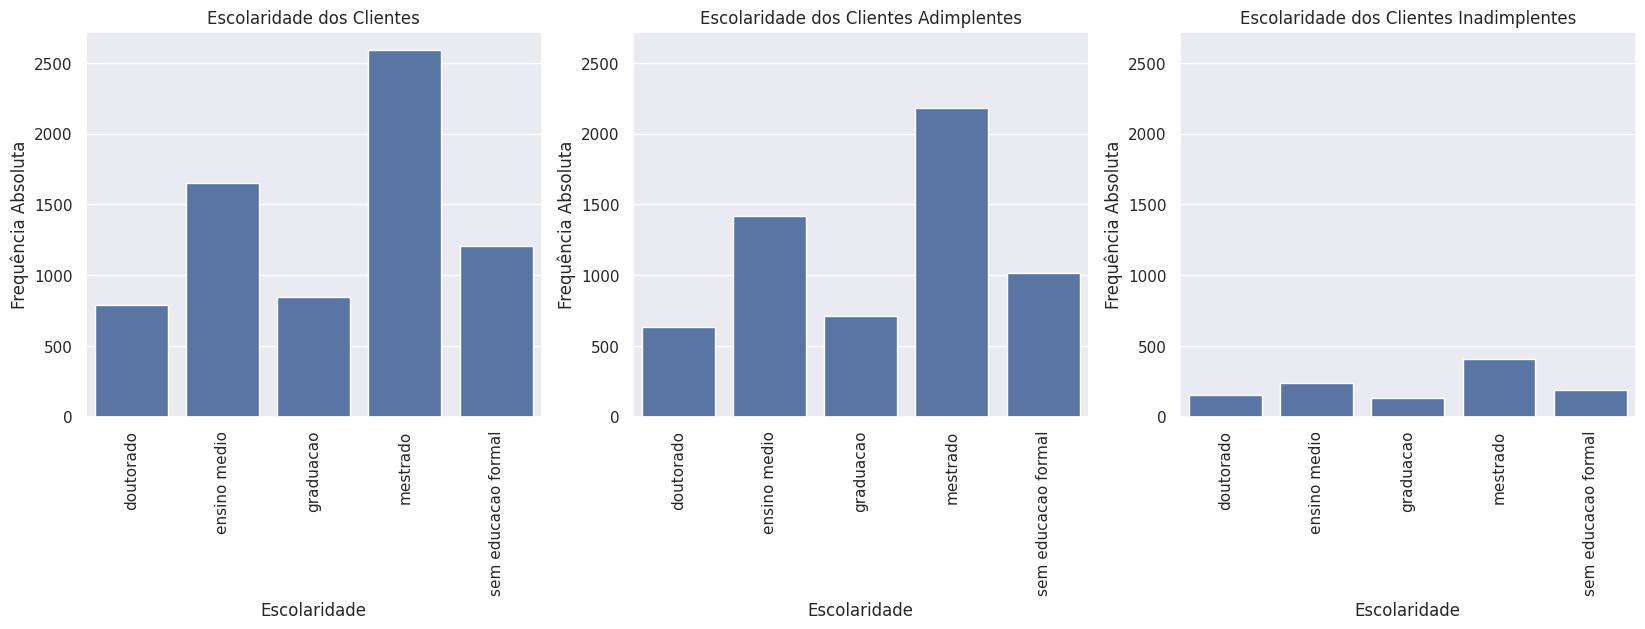

In [32]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']
eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplente, df_inadimplente]:

    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)
    f = sns.barplot(x=coluna, y='frequencia_absoluta', data=df_to_plot, ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1

figura.show()

Observando a coluna de escolaridade vemos que:
* o gráfico dos adimplentes e inadimplentes são similares e proporcional
* Não conseguimos extrair o motivo serem adimplentes e inadimplentes por não ter nada incomum no gráfico

***SALARIO ANUAL:***

<ipython-input-33-76cfaff1d125>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)
<ipython-input-33-76cfaff1d125>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)
<ipython-input-33-76cfaff1d125>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)


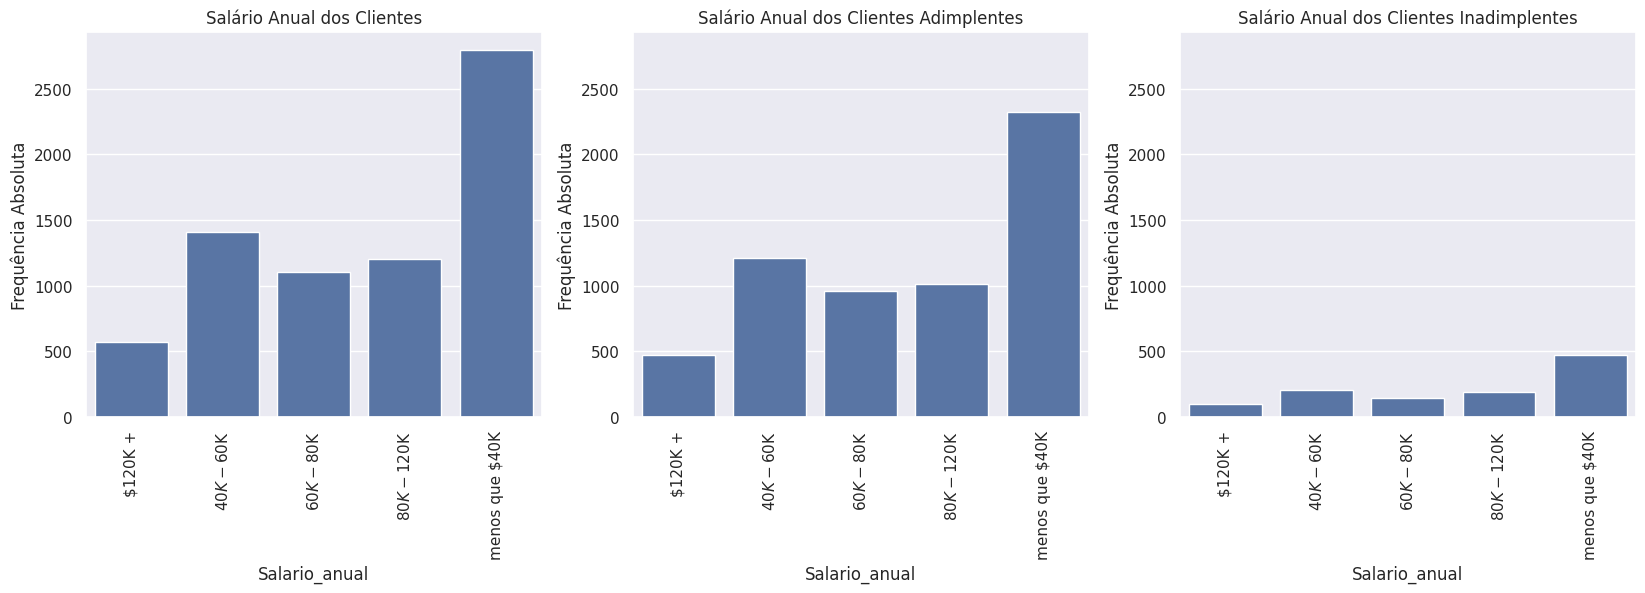

In [33]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplente, df_inadimplente]:

    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)
    f = sns.barplot(x=coluna, y='frequencia_absoluta', data=df_to_plot, ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1

figura.show()

Assim como a coluna de escolaridade, obeservamos que:
* o gráfico do salario anual não é muito diferente da coluna de escolaridade
* ambos apresentam um gráfico similar e sem nenhuma diferença em questão a sua proporção
* Não explica o motivo dos clientes serem adimplentes e inadimplentes

Conclusão das variaveis categóricas:
Não tivemos nenhuma informação relevante para nossa análise



**Visualizações Númericas**

In [34]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head()

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


Montando o gráfico

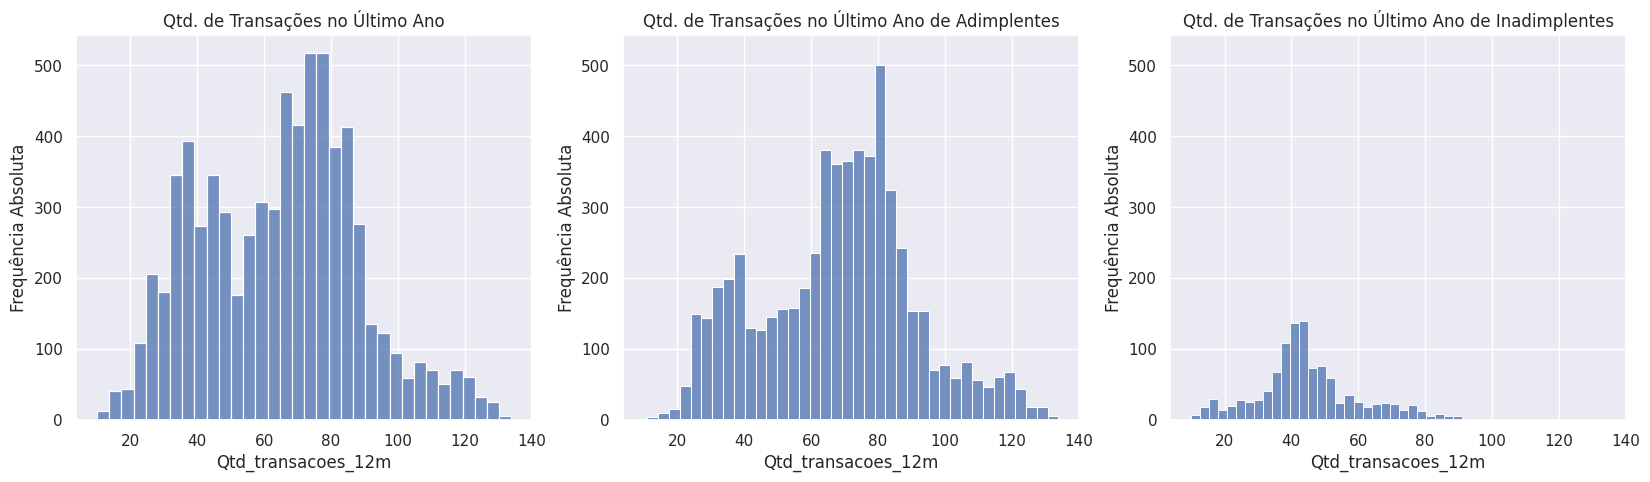

In [35]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Análise:
* Clientes adimplentes fazem transações entre 60 a 80 por ano
* Clientes inadimplentes fazem 40 a 50 transações por ano e nem chegam perto de fazer mais de 100 transações
* Enquanto os clientes adimplentes mantém uma média mais alta de transações, os inadimplentes uma média muito menor
* Quanto menor o número de transações do cliente, mais chances tem de ser inadimplente


Valor das transações feitas nos últimos 12m:

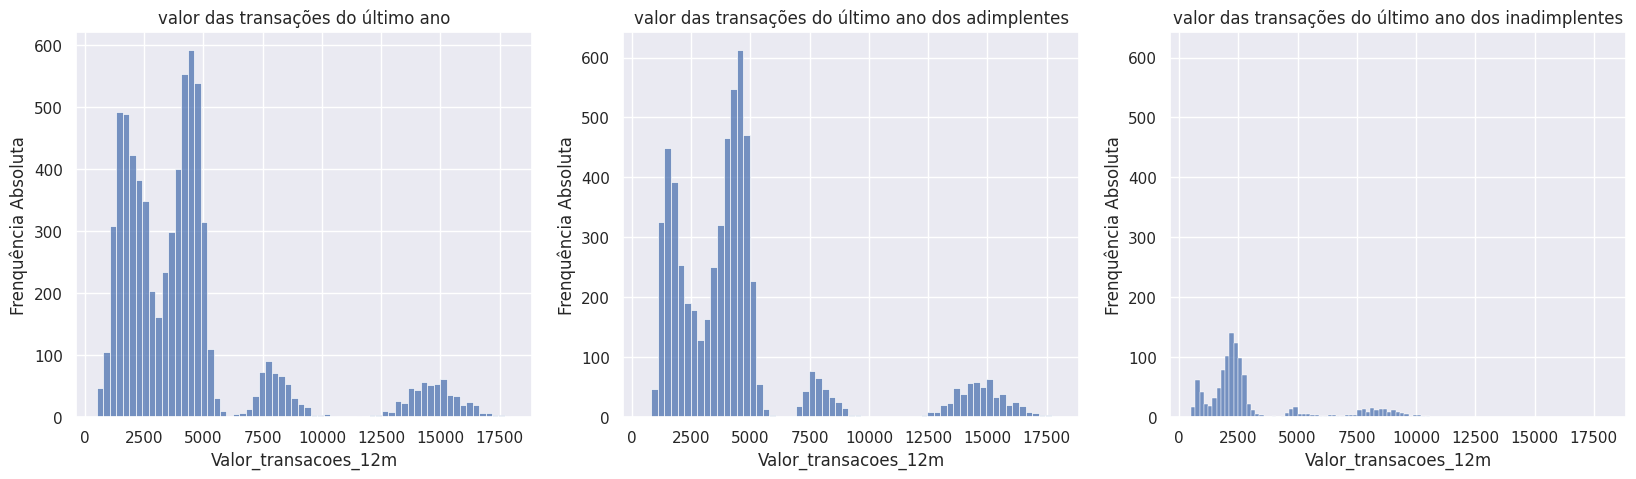

In [36]:
coluna = 'valor_transacoes_12m'
titulos = ['valor das transações do último ano', 'valor das transações do último ano dos adimplentes', 'valor das transações do último ano dos inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel = 'Frenquência Absoluta')
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

  figura.show()

Análise:
* observando vemos que existe na faixa mil a cinco mil no geral
* no valor das transações dos adimplentes o pico ainda se permanece nessa faixa, mas tem a presença quase unica dos valores 7,5 mil a 10 mil e 12,5 mil a 17,5 mil
* enquanto os inadimplentes se mantem em uma proporção muito inferior na faixa dos 2,5 mil
* com isso, temos que reparar aqueles clientes que fazem muitas transções na faixa dos 2,5 mil, pois é um fator de um possivel endividamento



**Relação entre valor e quantidade de transações do último ano**

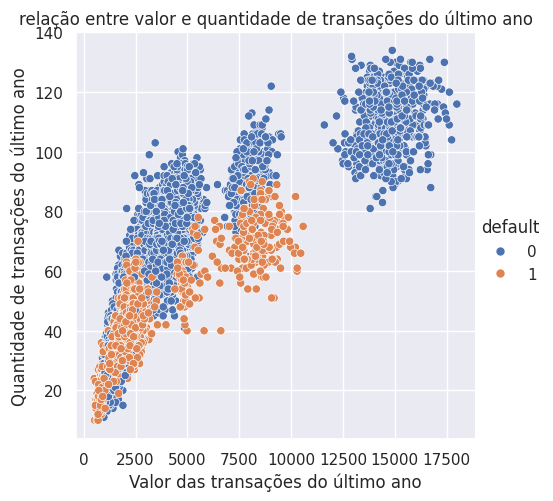

In [37]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
f.set(title='relação entre valor e quantidade de transações do último ano', xlabel='Valor das transações do último ano', ylabel='Quantidade de transações do último ano')

Análise Geral:

* Os clientes adimplentes se concentram em três áreas, uma grande parte em transações de pouco valor, mas indo de muitas transações a poucas transações, uma pequena parte em transações de valor mediano, mas apenas com bastante transações feitas e uma parte mediana onde não se concentra nenhum cliente inadimplente com muitas transações feitas e com valores muito altos

* Os clientes inadimplentes tem uma grande concentração em transações de pouco valor e poucas transações e uma parte onde está valor e quantidade de transações medianas

* Clientes que fazem muitas transações dos valores entre 12,5 mil à 17,5 mil, não apresentam nenhum risco de se tornarem clientes inadimplentes

* Clientes inadimplentes não fazem transações do valor acima de 11 mil e fazem menos de 100 transações

* É importante observar os clientes a quantidade e valor das transações dos clientes para saber se vão se tornar adimplentes e inadimplentes